In [1]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# #importing itables directly from VSCode did not work, so alternatively you can do it from the Anaconda prompt
# conda activate wbs
# !conda install -c conda-forge itables #!only needed when trying to import it from VSCode
from itables import show

In [ ]:
#finding out how many cpu cores you have
!wmic cpu get NumberOfCores,NumberOfLogicalProcessors

#divide the work between the existing cores - 1
import os
os.environ['OMP_NUM_THREADS']='7'

# Data import

In [3]:
#import the dataset in its original shape
audio_og = pd.read_csv('df_audio_features_5000_cleaned_whitespaces.csv')
#drop duplicates
audio_og.drop_duplicates(inplace=True)
show(audio_og)

In [4]:
#import the dataset a second time and drop the columns, that are not of any need for the analysis
audio = audio_og.copy().set_index(['name', 'artist'])
audio = audio.iloc[:, [0,3,4,5,6,7,8,9,10]]
audio

danceability  \
name                                               artist                                                           
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                            0.6580   
Saudade De Bahia                               ... Antônio Carlos Jobim                                    0.7420   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                        0.8510   
Mulher Eu Sei                                  ... Chico César                                             0.7050   
Rosa Morena                                    ... Kurt Elling                                             0.6510   
...                                                                                                           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                                0.2020   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                          0.1880   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                       0.0596   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                          0.1330   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                           0.3540   

                                                                                                     loudness  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                       -13.141   
Saudade De Bahia                               ... Antônio Carlos Jobim                               -12.646   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                   -11.048   
Mulher Eu Sei                                  ... Chico César                                        -18.115   
Rosa Morena                                    ... Kurt Elling                                        -19.807   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                           -23.390   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                     -21.873   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                  -42.959   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                     -29.443   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                      -24.568   

                                                                                                     mode  \
name                                               artist                                                   
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                         0   
Saudade De Bahia                               ... Antônio Carlos Jobim                                 1   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                     1   
Mulher Eu Sei                                  ... Chico César                                          1   
Rosa Morena                                    ... Kurt Elling                                          1   
...                                                                                                   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                             1   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                       1   
Schoenberg: 5 Orche

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>, <Axes: >, <Axes: >]],
      dtype=object)

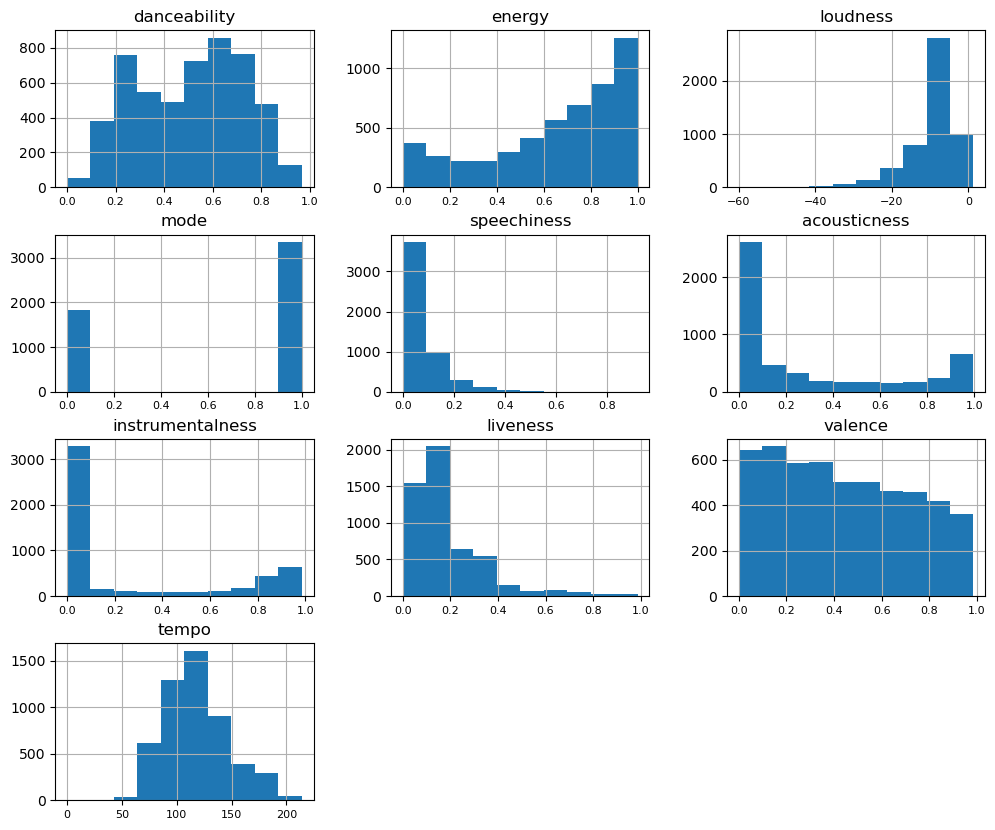

In [5]:
#plot the distribution of every feature in a histogram
audio_og.iloc[:, [2,3,5,6,7,8,9,10, 11, 12]].hist(xlabelsize=8, figsize=(12,10))
#plt.savefig(f"hist_features.png")

# Feature Selection

## Correlation between columns

In [6]:
#calculate the linear correlation between two features
audio_corr = audio_og.iloc[:, [2,3,5,6,7,8,9,10,11,12]].corr()
audio_corr

danceability    energy  loudness      mode  speechiness  \
danceability          1.000000  0.040491  0.358328 -0.088908     0.036121   
energy                0.040491  1.000000  0.786860 -0.008461     0.303940   
loudness              0.358328  0.786860  1.000000 -0.030855     0.233609   
mode                 -0.088908 -0.008461 -0.030855  1.000000    -0.041282   
speechiness           0.036121  0.303940  0.233609 -0.041282     1.000000   
acousticness         -0.111151 -0.850469 -0.697709  0.028854    -0.265754   
instrumentalness     -0.573800 -0.169923 -0.471786 -0.003017    -0.064754   
liveness             -0.032534  0.170642  0.134788 -0.009712     0.081963   
valence               0.680097  0.159101  0.335754  0.005966    -0.011395   
tempo                -0.009585  0.211617  0.213228  0.004739     0.064255   

                  acousticness  instrumentalness  liveness   valence     tempo  
danceability         -0.111151         -0.573800 -0.032534  0.680097 -0.009585  
energy               -0.850469         -0.169923  0.170642  0.159101  0.211617  
loudness             -0.697709         -0.471786  0.134788  0.335754  0.213228  
mode                  0.028854         -0.003017 -0.009712  0.005966  0.004739  
speechiness          -0.265754         -0.064754  0.081963 -0.011395  0.064255  
acousticness          1.000000          0.194941 -0.103144 -0.130646 -0.187994  
instrumentalness      0.194941          1.000000 -0.051664 -0.500584 -0.071945  
liveness             -0.103144         -0.051664  1.000000  0.007272  0.036370  
valence              -0.130646         -0.500584  0.007272  1.000000  0.098783  
tempo                -0.187994         -0.071945  0.036370  0.098783  1.000000

<Axes: >

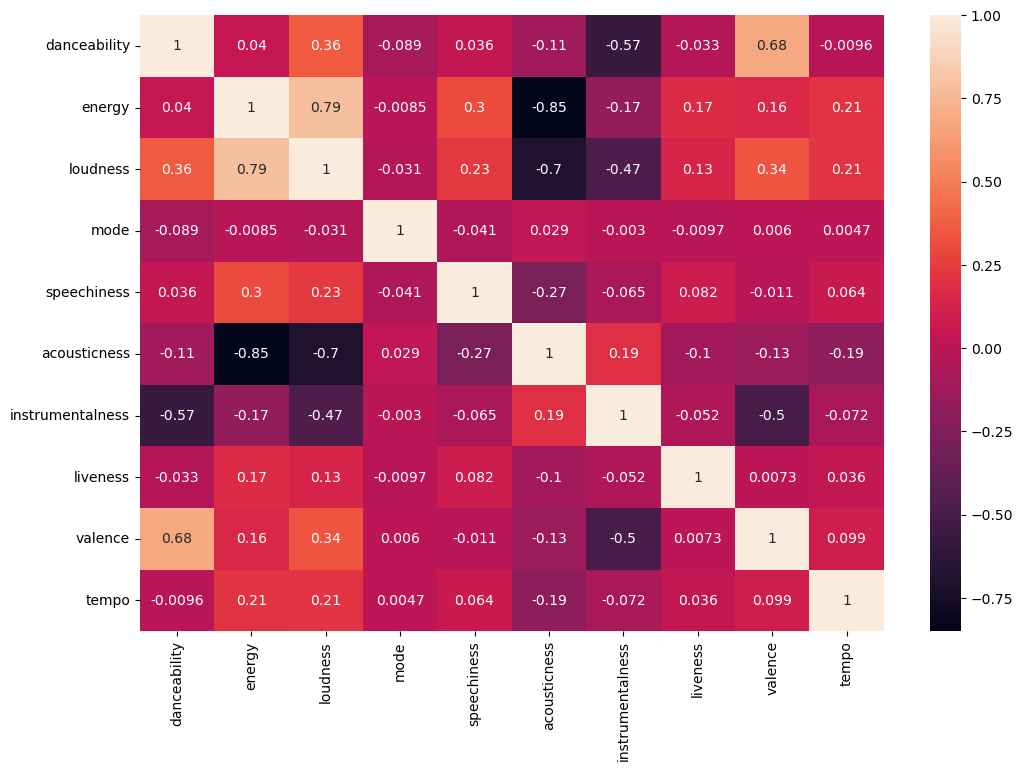

In [7]:
plt.subplots(figsize=(12, 8))
sns.heatmap(audio_corr, annot=True)
#plt.savefig("heatmat_correlation.png")

C:\Users\cathr\AppData\Local\Temp\ipykernel_15724\178487591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = audio_og.corr()[['energy']].sort_values(by='energy', ascending = False)


<Axes: >

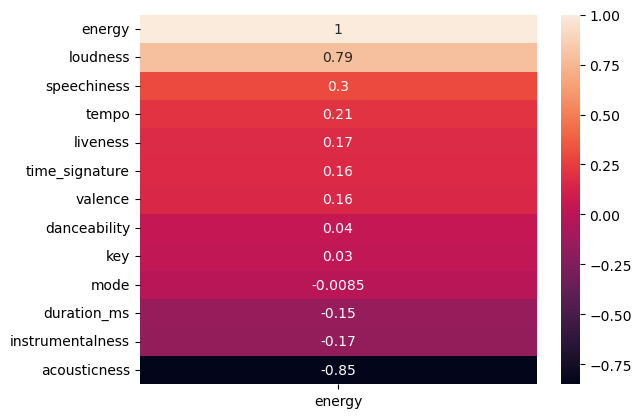

In [8]:
#plot the correlation for one feature
corr = audio_og.corr()[['energy']].sort_values(by='energy', ascending = False)
sns.heatmap(corr, annot=True)
#plt.savefig("heatmap_correlation_1feature.png")

## Variance

In [44]:
#calculate the variance of each feature
audio_var = audio_og.iloc[:, [2,3,5,6,7,8,9,10, 11, 12]].var()
audio_var

danceability          0.047542
energy                0.083137
loudness             39.625138
mode                  0.228661
speechiness           0.005068
acousticness          0.126725
instrumentalness      0.137408
liveness              0.022323
valence               0.077131
tempo               816.157103
dtype: float64

# Normalize Data

In [26]:
 #MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

min_max_audio = MinMaxScaler().fit_transform(audio)
norm_audio_df = pd.DataFrame(min_max_audio, columns=audio.columns, index=audio.index)
show(norm_audio_df)

In [36]:
# #Standard Scaler

# from sklearn.preprocessing import StandardScaler

# stand_norm_audio = StandardScaler().fit_transform(audio)
# norm_audio_df = pd.DataFrame(stand_norm_audio, columns=audio.columns, index=audio.index)
# show(norm_audio_df)

# Compute distances between songs

In [7]:
#compute euclidean distance between songs

distances = pairwise_distances(norm_audio_df)
eucl_audio = pd.DataFrame(distances, index = audio.index, columns=audio.index)
eucl_audio

name                                                                                                Se Eu Quiser Falar Com Deus                                                                                                                                                        \
artist                                                                                                                                                                                                                               Gilberto Gil                                       
name                                               artist                                                                                                                                                                                                                               
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                                                               0.000000                                                                                                                                  
Saudade De Bahia                               ... Antônio Carlos Jobim                                                                       1.473419                                                                                                                                  
Canta Canta, Minha Gente                       ... Martinho Da Vila                                                                           1.519723                                                                                                                                  
Mulher Eu Sei                                  ... Chico César                                                                                1.203939                                                                                                                                  
Rosa Morena                                    ... Kurt Elling                                                                                1.361429                                                                                                                                  
...                                                                                                                                                ...                                                                                                                                  
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                                                                   1.647701                                                                                                                                  
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                                                             1.550458                                                                                                                                  
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                                                          1.894906                                                                                                                                  
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                                                             1.592217                                                                                                                                  
Ravel: Boléro, M. 81                           ... Maurice Ravel                                                                              1.387227                                                                                                                                  

name                                                             

In [76]:
#plt.subplots(figsize=(12, 8))
#sns.heatmap(eucl_audio)

# Clustering using KMeans

In [27]:
from sklearn.cluster import KMeans

my_kmeans = KMeans(n_clusters =25, random_state = 30) # enter the number of desired clusters
my_kmeans.fit(norm_audio_df)
clusters = my_kmeans.predict(norm_audio_df)
#append the new column cluster to both dataframes
audio['cluster'] = clusters
audio_og['cluster'] = clusters
#show(audio_og)

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Qualitative Insights

In [20]:
#creating samples from each cluster to check consistency

audio_sample = audio.copy()

audio_sample.reset_index(inplace = True)
audio_sample = audio_sample[['name', 'artist', 'cluster']]
audio_sample

for x in audio_sample['cluster'].unique():
    samples = audio_sample.loc[audio_sample['cluster'] == x].sample(n=10)
    show(samples)

## Quantitative Insights

In [21]:
#get the average values for each feature per cluster
clusters = audio.groupby('cluster').mean(numeric_only=True)
clusters

danceability   loudness  mode  speechiness  acousticness  \
cluster                                                             
0            0.610955  -5.693480   0.0     0.105961      0.079119   
1            0.544370 -10.904460   1.0     0.048048      0.697634   
2            0.234605  -8.680688   1.0     0.108030      0.007295   
3            0.576272  -5.881728   1.0     0.064159      0.085192   
4            0.558368 -11.701250   0.0     0.066625      0.762665   
5            0.244681 -23.401946   0.0     0.044558      0.934718   
6            0.515308  -6.408792   1.0     0.084179      0.082014   
7            0.258637 -23.299678   1.0     0.043906      0.947609   
8            0.618557  -6.727810   0.0     0.068001      0.069907   
9            0.731920  -6.267182   1.0     0.106281      0.126904   
10           0.778838  -6.349785   0.0     0.103708      0.189995   
11           0.275222  -6.911275   1.0     0.121190      0.016383   
12           0.642408  -8.597874   1.0     0.073390      0.605798   
13           0.263597  -7.919800   1.0     0.106543      0.015819   
14           0.601520  -5.899893   0.0     0.108815      0.169434   
15           0.741941  -7.155780   1.0     0.076860      0.129763   
16           0.657681  -5.813067   0.0     0.075881      0.097288   
17           0.253841  -8.544645   0.0     0.104548      0.006705   
18           0.585505  -6.810893   1.0     0.110854      0.203509   
19           0.333862 -16.624638   1.0     0.044291      0.922384   
20           0.642102  -6.532525   1.0     0.073119      0.049495   
21           0.474581  -8.170371   1.0     0.059448      0.085562   
22           0.487788 -19.031400   0.0     0.049532      0.891659   
23           0.473323 -18.340904   1.0     0.049825      0.923412   
24           0.317662  -6.960118   0.0     0.108304      0.025446   

         instrumentalness  liveness   valence       tempo  
cluster                                                    
0                0.021519  0.187942  0.672864  142.278774  
1                0.033933  0.159642  0.439891  117.662532  
2                0.855966  0.196598  0.200863  120.632997  
3                0.016589  0.161935  0.292955  123.326289  
4                0.031037  0.155955  0.465193  115.268915  
5                0.867510  0.126818  0.085832   95.836899  
6                0.025144  0.173866  0.662472  144.708636  
7                0.860849  0.132697  0.100451   95.197492  
8                0.735215  0.195187  0.482451  128.032380  
9                0.012438  0.155761  0.554253  106.296645  
10               0.008036  0.137112  0.788573  107.017268  
11               0.058987  0.187826  0.194804  120.595051  
12               0.017805  0.186360  0.820118  122.726691  
13               0.474531  0.210135  0.225472  118.853848  
14               0.021428  0.704680  0.476639  122.927920  
15               0.011619  0.141878  0.843232  116.142347  
16               0.013352  0.168646  0.362063  119.684482  
17               0.802545  0.196967  0.216822  121.789268  
18               0.005979  0.636748  0.570009  122.190087  
19               0.047329  0.183936  0.185601  103.574065  
20               0.761746  0.248020  0.321251  127.779746  
21               0.743161  0.202532  0.713823  131.294613  
22               0.858718  0.147593  0.339458  112.655518  
23               0.847535  0.141509  0.352395  134.213825  
24               0.079953  0.181337  0.202148  123.257692

In [22]:
#get number of songs per cluster
clusters_count = audio.groupby('cluster').count()
clusters_count

danceability  loudness  mode  speechiness  acousticness  \
cluster                                                            
0                 221       221   221          221           221   
1                 265       265   265          265           265   
2                 388       388   388          388           388   
3                 301       301   301          301           301   
4                 212       212   212          212           212   
5                 149       149   149          149           149   
6                 250       250   250          250           250   
7                 258       258   258          258           258   
8                  79        79    79           79            79   
9                 324       324   324          324           324   
10                321       321   321          321           321   
11                273       273   273          273           273   
12                262       262   262          262           262   
13                145       145   145          145           145   
14                 75        75    75           75            75   
15                409       409   409          409           409   
16                282       282   282          282           282   
17                231       231   231          231           231   
18                103       103   103          103           103   
19                138       138   138          138           138   
20                 59        59    59           59            59   
21                 62        62    62           62            62   
22                 85        85    85           85            85   
23                114       114   114          114           114   
24                169       169   169          169           169   

         instrumentalness  liveness  valence  tempo  
cluster                                              
0                     221       221      221    221  
1                     265       265      265    265  
2                     388       388      388    388  
3                     301       301      301    301  
4                     212       212      212    212  
5                     149       149      149    149  
6                     250       250      250    250  
7                     258       258      258    258  
8                      79        79       79     79  
9                     324       324      324    324  
10                    321       321      321    321  
11                    273       273      273    273  
12                    262       262      262    262  
13                    145       145      145    145  
14                     75        75       75     75  
15                    409       409      409    409  
16                    282       282      282    282  
17                    231       231      231    231  
18                    103       103      103    103  
19                    138       138      138    138  
20                     59        59       59     59  
21                     62        62       62     62  
22                     85        85       85     85  
23                    114       114      114    114  
24                    169       169      169    169

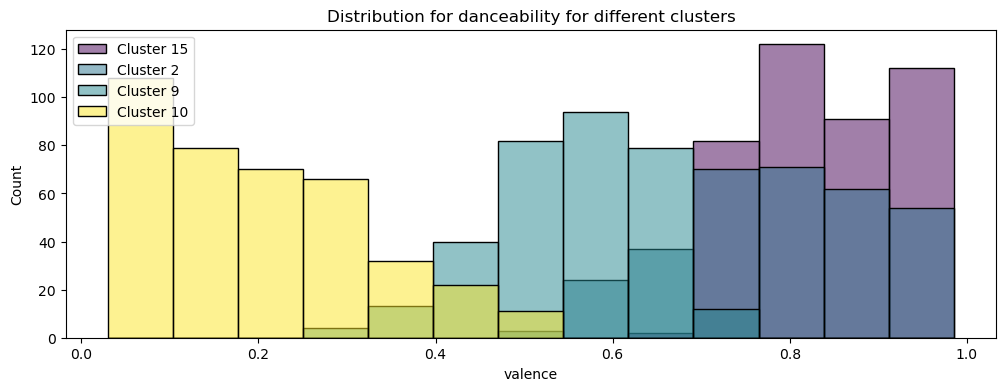

In [63]:
#plotting the distribution of one feature across randomly picked clusters

fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=audio_og.query('cluster == 15 | cluster == 2 | cluster == 9| cluster == 10'), x='valence', hue='cluster', multiple='layer', palette='viridis_r'),
plt.legend(labels=['Cluster 15', 'Cluster 2','Cluster 9', 'Cluster 10'])
plt.title('Distribution for danceability for different clusters')
plt.show()

In [23]:
#calculate the centroids' coordinates for each feature
centroids = my_kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids)
centroids_df

0         1             2         3         4         5         6  \
0   0.632182  0.885277  2.220446e-16  0.116206  0.079247  0.021748  0.190751   
1   0.562947  0.800358  1.000000e+00  0.052340  0.700436  0.034449  0.161744   
2   0.242611  0.836610  1.000000e+00  0.117680  0.007324  0.869002  0.199188   
3   0.595938  0.882238  1.000000e+00  0.069890  0.085534  0.016841  0.164068   
4   0.577423  0.787368 -4.440892e-16  0.072576  0.765728  0.031510  0.158009   
5   0.253031  0.596623 -5.551115e-16  0.048539  0.938472  0.880721  0.128488   
6   0.532893  0.873646  1.000000e+00  0.091698  0.082343  0.025527  0.176156   
7   0.267464  0.598290  1.000000e+00  0.047828  0.951414  0.873958  0.134445   
8   0.639666  0.868446  2.220446e-16  0.074075  0.070187  0.746411  0.197758   
9   0.756897  0.875955  1.000000e+00  0.115774  0.127414  0.012627  0.157812   
10  0.805022  0.874476 -2.220446e-16  0.112933  0.190899  0.008133  0.138858   
11  0.284614  0.865455  1.000000e+00  0.132016  0.016449  0.059886  0.190300   
12  0.664331  0.837960  1.000000e+00  0.079945  0.608231  0.018077  0.188814   
13  0.272592  0.849014  1.000000e+00  0.116060  0.015883  0.481757  0.212903   
14  0.622048  0.881942  0.000000e+00  0.118534  0.170114  0.021754  0.713961   
15  0.767261  0.861469  1.000000e+00  0.083726  0.130284  0.011795  0.143746   
16  0.679892  0.883519 -2.220446e-16  0.081749  0.097056  0.014268  0.170736   
17  0.262503  0.838827 -1.110223e-15  0.113886  0.006732  0.814767  0.199561   
18  0.605486  0.867091  1.000000e+00  0.120756  0.204327  0.006070  0.645134   
19  0.345256  0.707107  1.000000e+00  0.048248  0.926088  0.048050  0.186358   
20  0.664014  0.871629  1.000000e+00  0.079650  0.049693  0.773346  0.251287   
21  0.490776  0.844929  1.000000e+00  0.064759  0.085905  0.754478  0.205200   
22  0.504435  0.667872  2.220446e-16  0.053956  0.895240  0.871795  0.149537   
23  0.489475  0.679128  1.000000e+00  0.054276  0.927121  0.860442  0.143373   
24  0.326598  0.864612  2.220446e-16  0.118378  0.025696  0.080542  0.183769   

           7         8  
0   0.682558  0.663868  
1   0.446589  0.549851  
2   0.203922  0.563732  
3   0.297417  0.576318  
4   0.472277  0.538665  
5   0.087139  0.447857  
6   0.672560  0.676240  
7   0.101980  0.444869  
8   0.489798  0.598310  
9   0.562693  0.496737  
10  0.799849  0.499923  
11  0.197771  0.563555  
12  0.832607  0.573516  
13  0.228906  0.555418  
14  0.483897  0.574456  
15  0.856073  0.542747  
16  0.365013  0.560251  
17  0.220124  0.569135  
18  0.578689  0.571008  
19  0.188427  0.484014  
20  0.326143  0.597130  
21  0.724693  0.613555  
22  0.344627  0.526452  
23  0.357761  0.627197  
24  0.206227  0.575922

In [24]:
#compute distances for centroids

distances = pairwise_distances(centroids_df)
eucl_centroids = pd.DataFrame(distances, index = centroids_df.index, columns=centroids_df.index)
eucl_centroids

0         1         2         3             4         5   \
0   2.980232e-08  1.213113  1.454764  1.077146  7.394627e-01  1.453554   
1   1.213113e+00  0.000000  1.159983  0.639901  1.002925e+00  1.432173   
2   1.454764e+00  1.159983  0.000000  0.933613  1.570817e+00  1.400614   
3   1.077146e+00  0.639901  0.933613  0.000000  1.226483e+00  1.653903   
4   7.394627e-01  1.002925  1.570817  1.226483  2.980232e-08  1.025008   
5   1.453554e+00  1.432173  1.400614  1.653903  1.025008e+00  0.000000   
6   1.005527e+00  0.676156  1.017938  0.394301  1.239440e+00  1.737351   
7   1.759316e+00  1.013138  0.991128  1.315203  1.422360e+00  1.000345   
8   7.542124e-01  1.385860  1.123597  1.254295  1.005363e+00  1.088831   
9   1.030257e+00  0.626500  1.071801  0.326448  1.208164e+00  1.725466   
10  2.932245e-01  1.206605  1.566971  1.147047  7.079293e-01  1.488991   
11  1.171292e+00  0.787054  0.810969  0.344195  1.317045e+00  1.622831   
12  1.146781e+00  0.414159  1.288365  0.752995  1.080349e+00  1.629959   
13  1.250718e+00  0.899703  0.389831  0.579916  1.387850e+00  1.455259   
14  5.740958e-01  1.266046  1.494607  1.160770  8.236491e-01  1.437672   
15  1.034195e+00  0.734916  1.206551  0.587911  1.262280e+00  1.828800   
16  3.403112e-01  1.180159  1.400035  1.006082  6.923737e-01  1.347581   
17  9.979276e-01  1.496243  1.001823  1.328601  1.165904e+00  0.986386   
18  1.114823e+00  0.713749  1.120468  0.572453  1.254968e+00  1.740772   
19  1.453635e+00  0.422841  1.247789  0.906853  1.082259e+00  1.314961   
20  1.305166e+00  1.005104  0.458221  0.766349  1.452979e+00  1.463368   
21  1.251289e+00  0.993341  0.597886  0.861527  1.437802e+00  1.516926   
22  1.261214e+00  1.330852  1.383163  1.563993  8.713902e-01  0.378390   
23  1.611855e+00  0.876332  0.983194  1.216314  1.324435e+00  1.081160   
24  5.786295e-01  1.257254  1.276807  1.044772  8.329849e-01  1.260632   

          6         7         8         9   ...        15        16        17  \
0   1.005527  1.759316  0.754212  1.030257  ...  1.034195  0.340311  0.997928   
1   0.676156  1.013138  1.385860  0.626500  ...  0.734916  1.180159  1.496243   
2   1.017938  0.991128  1.123597  1.071801  ...  1.206551  1.400035  1.001823   
3   0.394301  1.315203  1.254295  0.326448  ...  0.587911  1.006082  1.328601   
4   1.239440  1.422360  1.005363  1.208164  ...  1.262280  0.692374  1.165904   
5   1.737351  1.000345  1.088831  1.725466  ...  1.828800  1.347581  0.986386   
6   0.000000  1.415681  1.253595  0.312393  ...  0.331926  1.063116  1.385695   
7   1.415681  0.000000  1.477495  1.399150  ...  1.521923  1.674937  1.411317   
8   1.253595  1.477495  0.000000  1.254782  ...  1.303786  0.745928  0.476436   
9   0.312393  1.399150  1.254782  0.000000  ...  0.299566  1.025352  1.424127   
10  1.065492  1.785384  0.835342  1.031013  ...  1.005562  0.468288  1.150969   
11  0.554239  1.281411  1.300068  0.613727  ...  0.828571  1.093636  1.253828   
12  0.575872  1.272638  1.392748  0.567644  ...  0.493115  1.217695  1.591982   
13  0.703063  1.063518  1.131374  0.765305  ...  0.937087  1.189001  1.054340   
14  1.162602  1.745383  0.897024  1.158312  ...  1.220274  0.565265  1.058739   
15  0.331926  1.521923  1.303786  0.299566  ...  0.000000  1.118664  1.524623   
16  1.063116  1.674937  0.745928  1.025352  ...  1.118664  0.000000  0.920925   
17  1.385695  1.411317  0.476436  1.424127  ...  1.524623  0.920925  0.000000   
18  0.511118  1.416745  1.333507  0.521768  ...  0.601847  1.135662  1.462404   
19  1.024053  0.844014  1.561303  0.991315  ...  1.135258  1.367442  1.571624   
20  0.842347  1.069246  1.015593  0.818203  ...  0.944766  1.260238  1.087069   
21  0.736341  1.138244  1.038549  0.817672  ...  0.810355  1.311097  1.149373   
22  1.597571  1.062994  0.885391  1.577050  ...  1.641364  1.205204  0.950722   
23  1.246769  0.394190  1.351796  1.237571  ...  1.312203  1.577684  1.398302   
24  1.130122  1.611316  0.791492  1.155104  ...  1.279086  0.402

<Axes: >

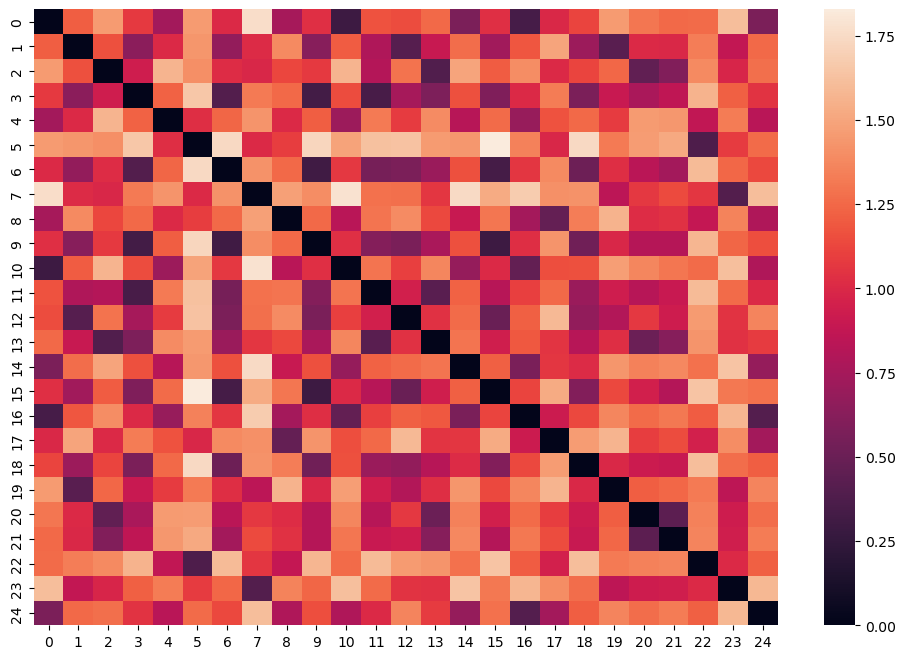

In [25]:
#plot a heatmap of the centroids' distances
plt.subplots(figsize=(12, 8))
sns.heatmap(eucl_centroids)
#plt.savefig("heatmap_centroids.png")

In [26]:
#plot the clusters in a parallel coordinates plot
import plotly.express as px
fig = px.parallel_coordinates(clusters,
                              dimensions=clusters.columns)
#plt.savefig("parallel_coordinates_centroids.png")
fig.show()


c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


## Parallel Coordinates 

In [42]:
#plot parallel coordinates for the songs
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(audio, color="cluster",
                              dimensions=audio.columns,
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


# Which K to choose?

## Inertia

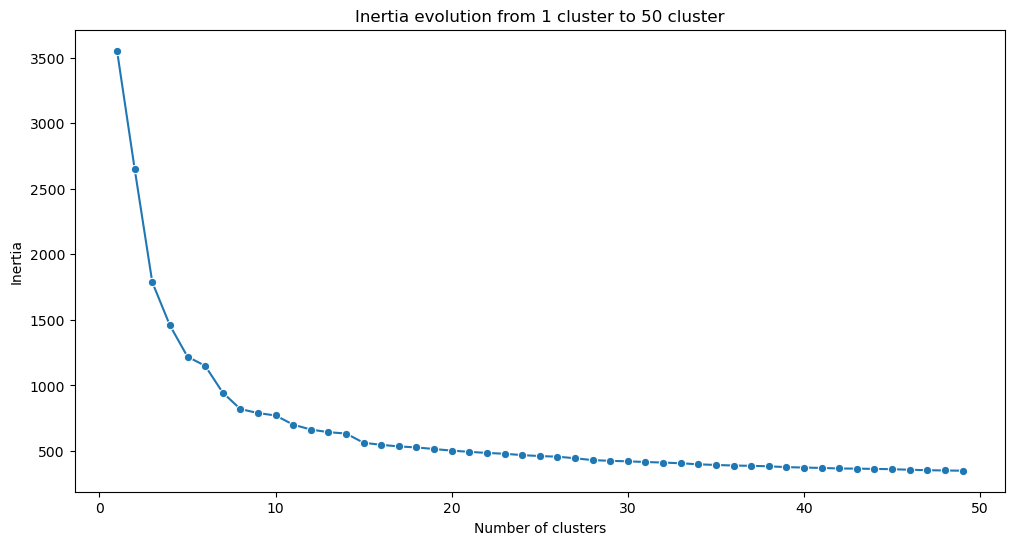

In [28]:
max_k = 50
inertia = []

for k in range(1, max_k):
    inertia.append(KMeans(n_clusters=k, random_state = 30, n_init="auto").fit(norm_audio_df).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig(f"inertia.png")
plt.show()

In [45]:
#if I wanted to append the number of clusters back to the df
audio_kmeans = KMeans(n_clusters=25,random_state = 30).fit(norm_audio_df)
#audio['cluster'] = audio_kmeans.predict(norm_min_max_audio_df)

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Silouette score

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(norm_audio_df, audio_kmeans.labels_)

0.21735358568591007

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:8

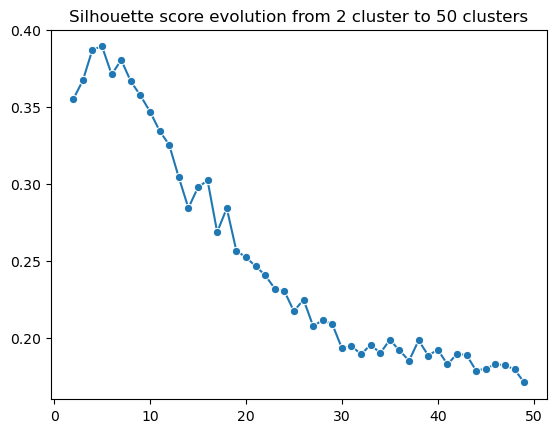

In [47]:
max_k = 50
sil_score = []


for k in range(2, max_k):
    labels = KMeans(n_clusters=k, random_state = 30).fit(norm_audio_df).labels_
    sil_score.append(silhouette_score(norm_audio_df, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.savefig(f"silhouette.png")
plt.show()

The silhouette coefficient can vary between -1 and +1:

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



* For k = 2 the average to silhouette is: 0.355
	- For cluster = 0 the silhouette value is: 0.36
	- For cluster = 1 the silhouette value is: 0.35


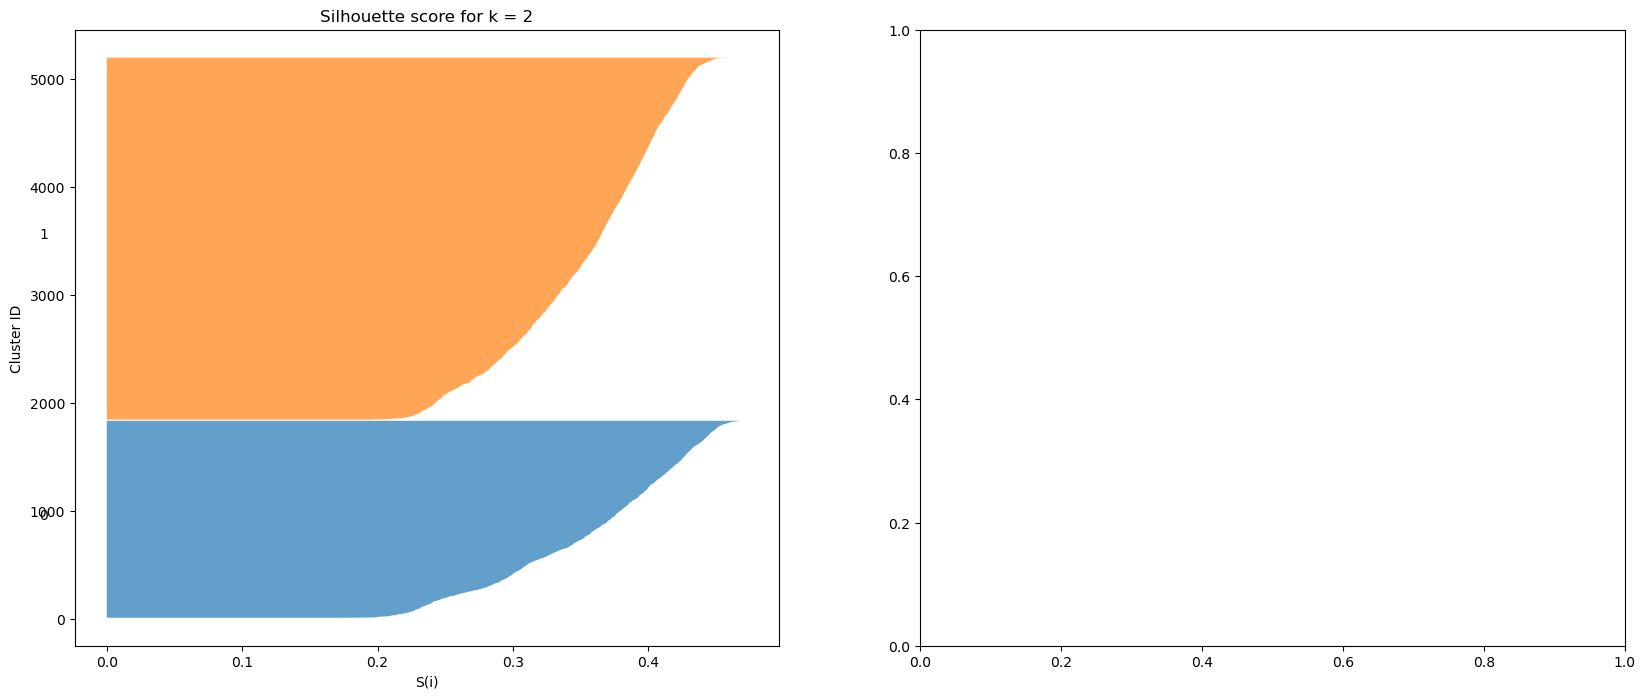

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



* For k = 3 the average to silhouette is: 0.3672
	- For cluster = 0 the silhouette value is: 0.37
	- For cluster = 1 the silhouette value is: 0.22
	- For cluster = 2 the silhouette value is: 0.44


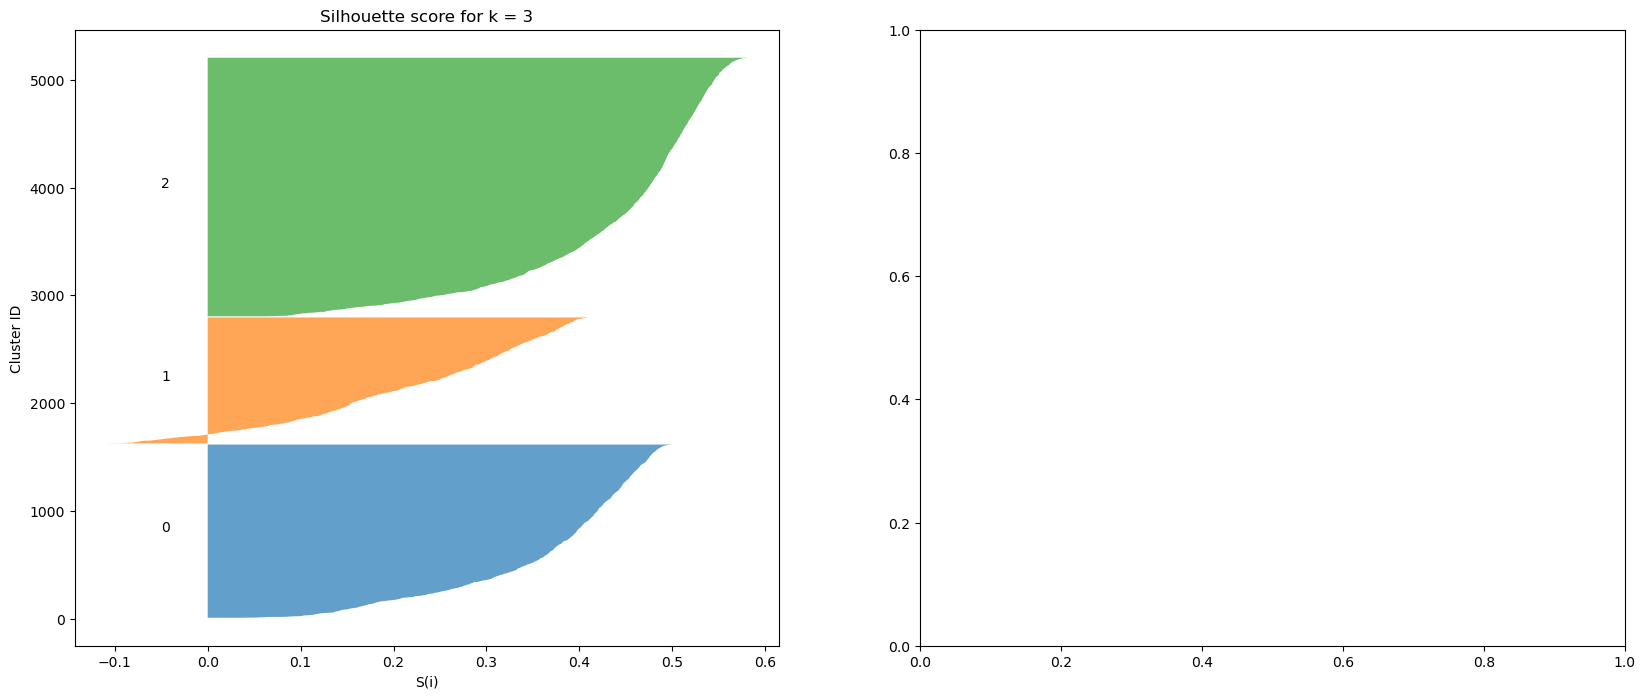

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



* For k = 4 the average to silhouette is: 0.3873
	- For cluster = 0 the silhouette value is: 0.41
	- For cluster = 1 the silhouette value is: 0.41
	- For cluster = 2 the silhouette value is: 0.32
	- For cluster = 3 the silhouette value is: 0.32


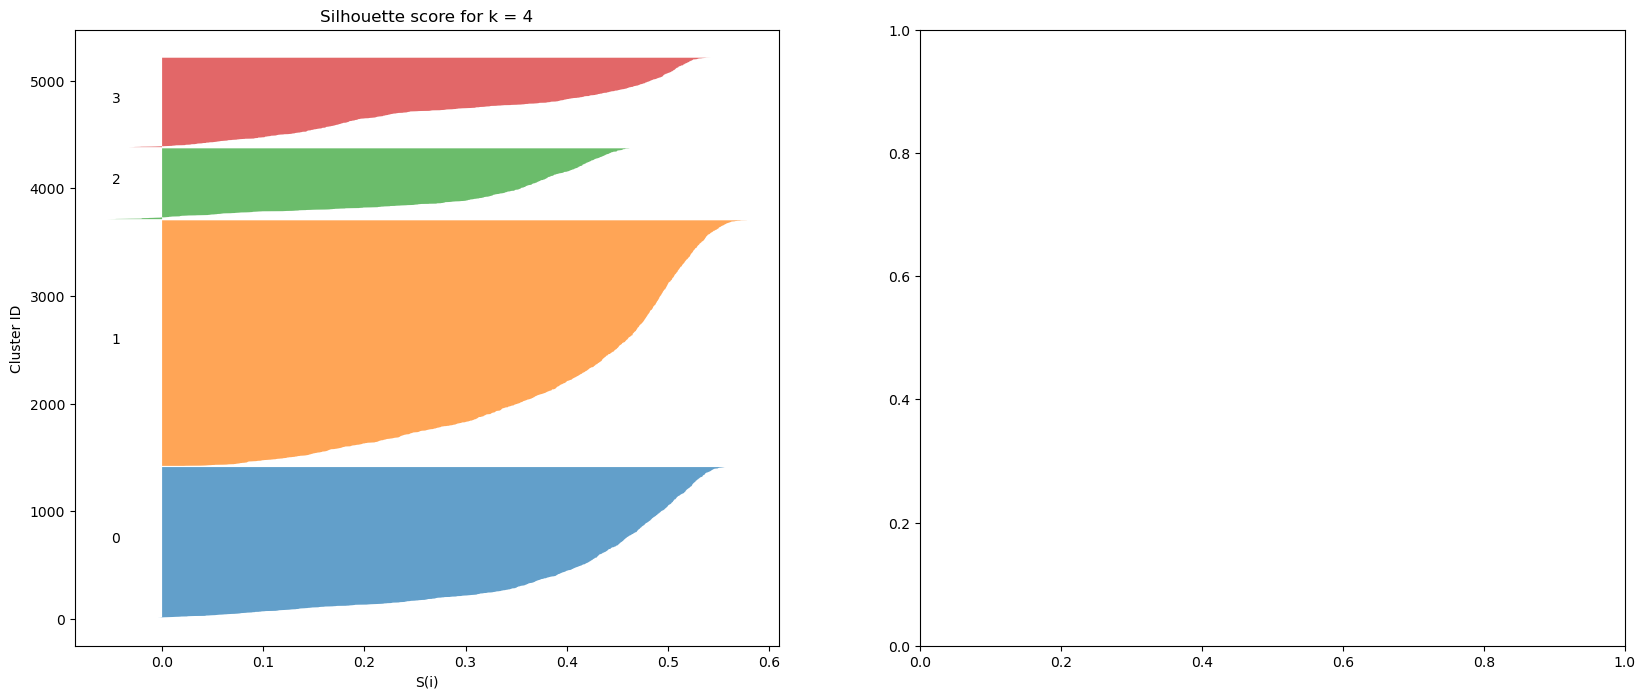

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



* For k = 5 the average to silhouette is: 0.3893
	- For cluster = 0 the silhouette value is: 0.36
	- For cluster = 1 the silhouette value is: 0.43
	- For cluster = 2 the silhouette value is: 0.37
	- For cluster = 3 the silhouette value is: 0.48
	- For cluster = 4 the silhouette value is: 0.29


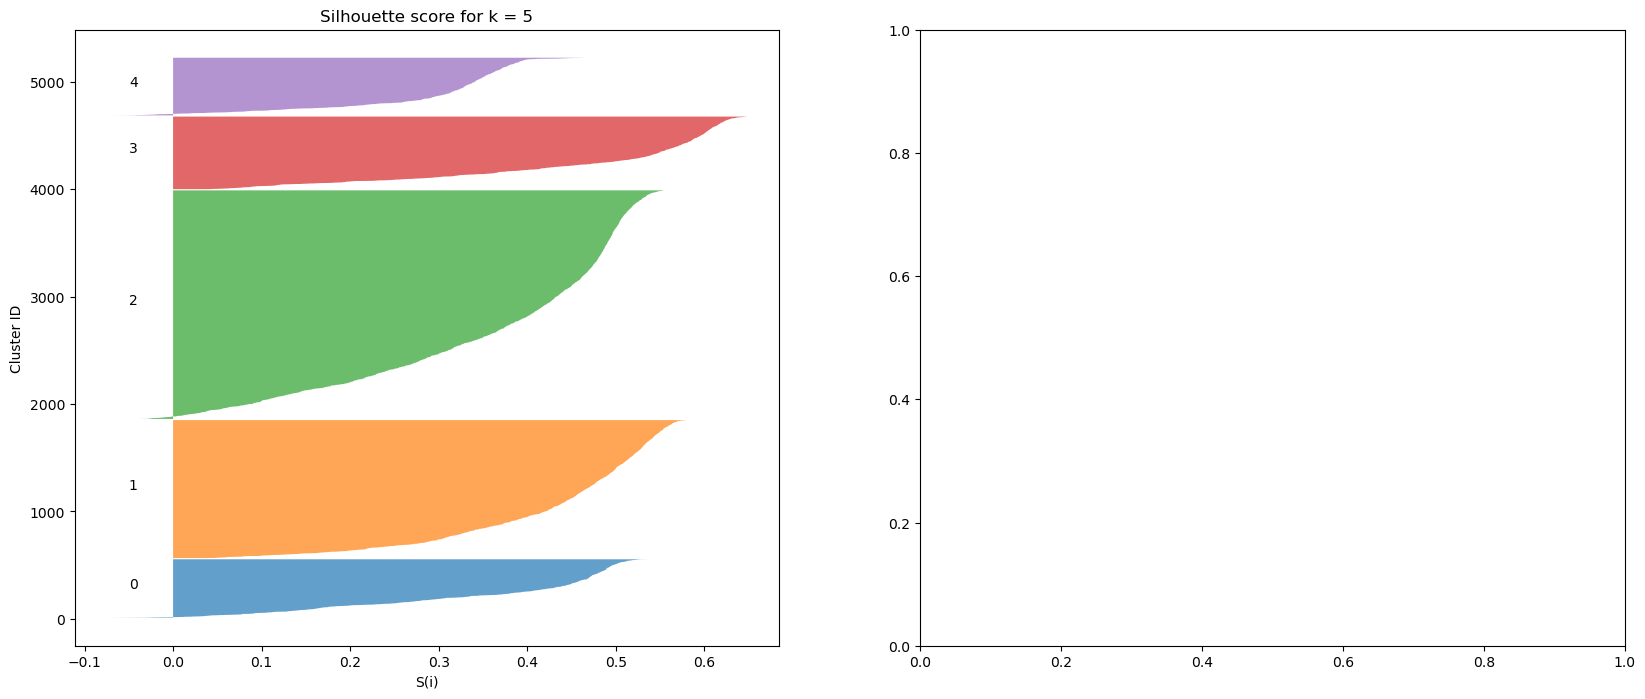

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



* For k = 6 the average to silhouette is: 0.3706
	- For cluster = 0 the silhouette value is: 0.27
	- For cluster = 1 the silhouette value is: 0.42
	- For cluster = 2 the silhouette value is: 0.54
	- For cluster = 3 the silhouette value is: 0.47
	- For cluster = 4 the silhouette value is: 0.27
	- For cluster = 5 the silhouette value is: 0.33


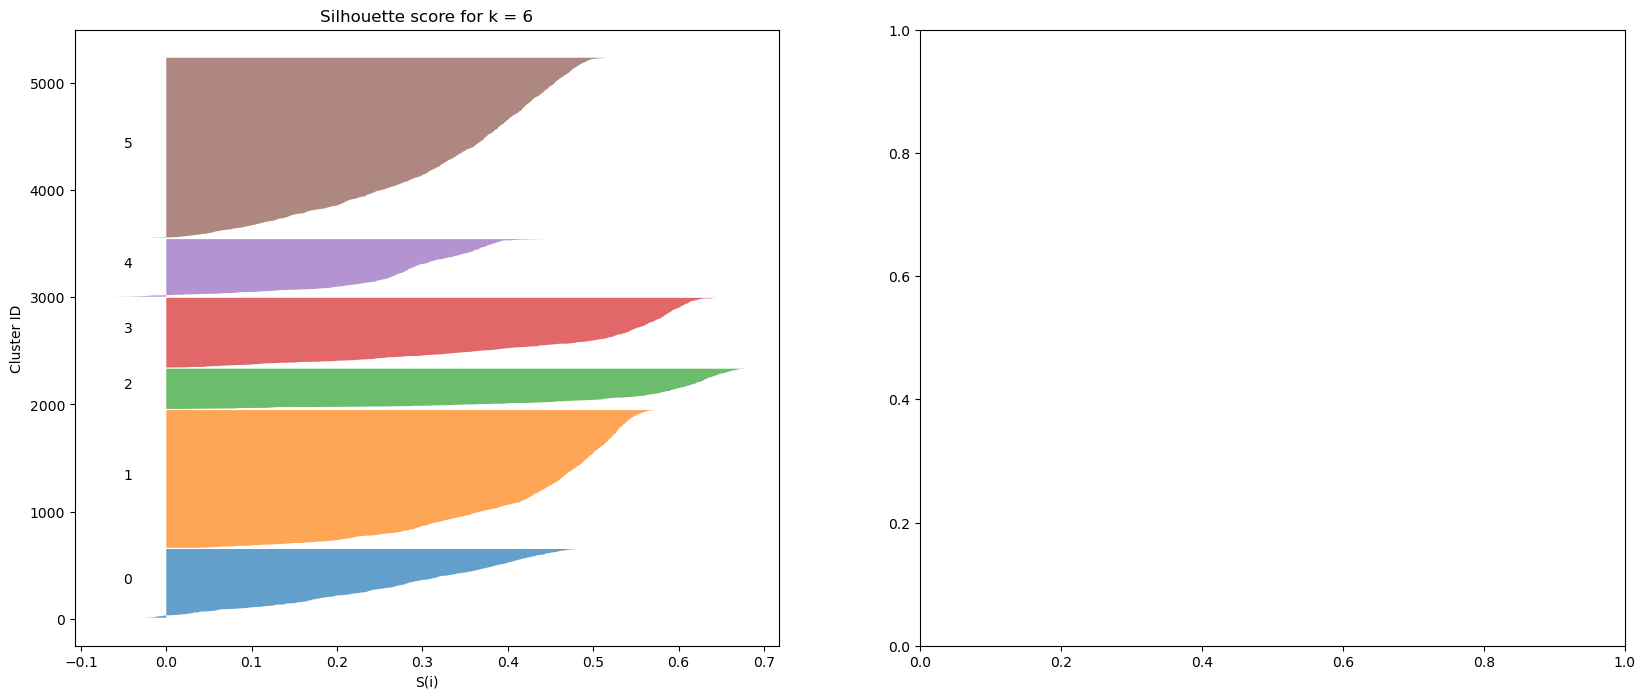

c:\Users\cathr\anaconda3\envs\wbs\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



* For k = 7 the average to silhouette is: 0.3805
	- For cluster = 0 the silhouette value is: 0.27
	- For cluster = 1 the silhouette value is: 0.39
	- For cluster = 2 the silhouette value is: 0.54
	- For cluster = 3 the silhouette value is: 0.32
	- For cluster = 4 the silhouette value is: 0.47
	- For cluster = 5 the silhouette value is: 0.47
	- For cluster = 6 the silhouette value is: 0.42


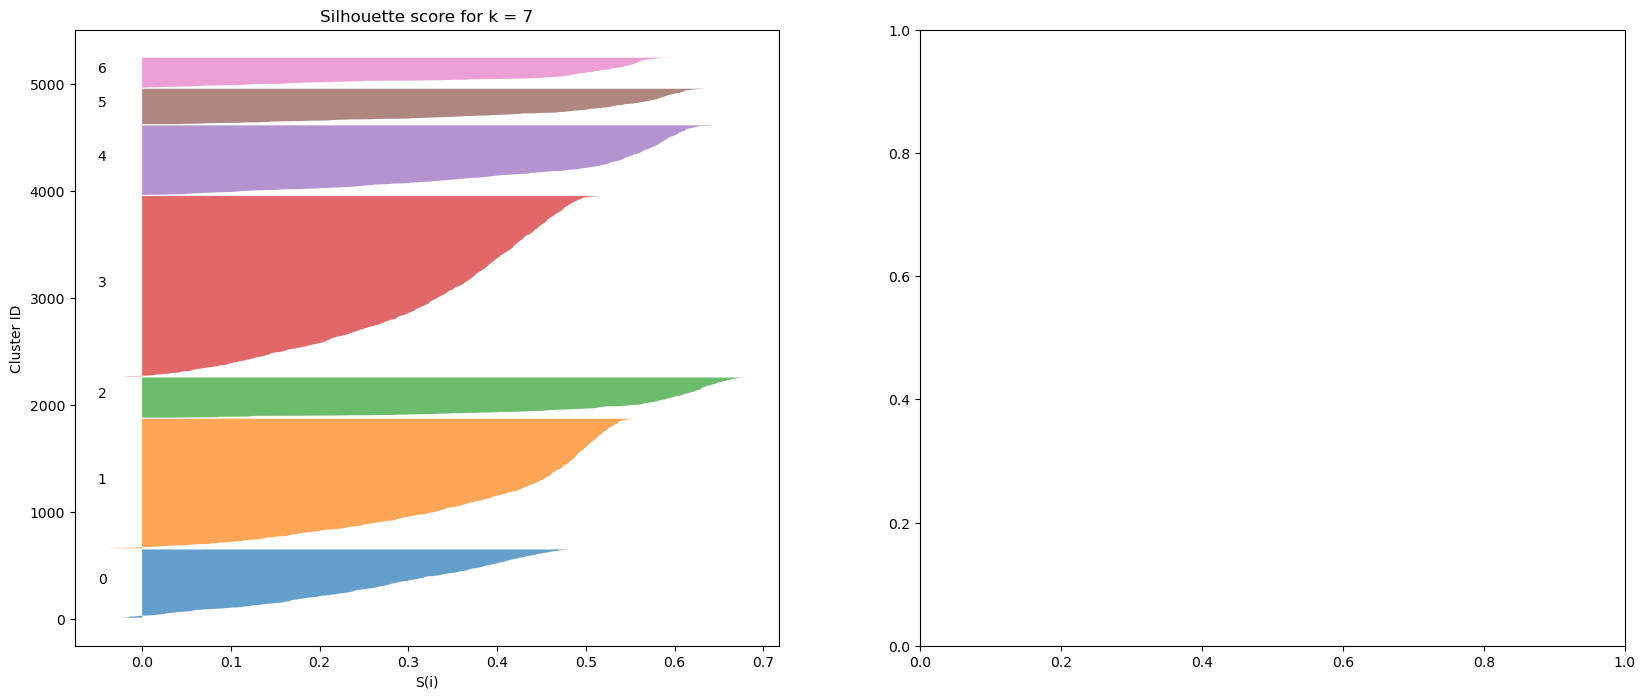

In [29]:
#plot the silhouette scores for a defined range
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 8
data = norm_audio_df

for k in range(1, max_k):
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_

    if 1 < k < data.shape[0]:

        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)

        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)

        y_lower = 10

        for i in range(k):
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")

            ith_cluster_sv.sort()

            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size


            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv,
                                alpha = 0.7)


            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))

            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation

        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

        plt.show()

# Use Spotify API to select artists genres

In [5]:
import requests
from urllib.parse import urlencode
import base64
import webbrowser
import base64
import json
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
import keys_spotify
import time

In [ ]:
def get_token():
    client_id = keys_spotify.client_id
    client_secret = keys_spotify.client_secret
    auth_string = client_id + ':' + client_secret
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')
    
    url = 'https://accounts.spotify.com/api/token'
    headers = {
        'Authorization': 'Basic ' + auth_base64,
        'Content-Type':'application/x-www-form-urlencoded'
    }
    data = {'grant_type' : 'client_credentials'}
    result = requests.post(url, headers = headers, data=data)
    json_result = json.loads(result.content)
    token = json_result['access_token']
    return token


def get_auth_header(token):
    return{'Authorization': 'Bearer ' + token}

In [34]:
def search_for_artist_ids(token):
    artist_ids = []
    
    for i, row in audio_og.iterrows():
        original_track_id = row['id']
        track_id = original_track_id[:-1]
        url = f'https://api.spotify.com/v1/tracks/{track_id}'
        headers = get_auth_header(token)
        
        result = requests.get(url, headers = headers)
        json_result = json.loads(result.content)
        
        artist_ids.append(json_result['artists'][0]['id'])
        #time.sleep(1)
    return artist_ids
            
    

token = get_token()
artist_ids = search_for_artist_ids(token)

audio_og['artists_id'] = artist_ids
audio_og

name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231  Winter Fragments pour ensemble instrumental, s...   
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                            0.6580  0.25900   
1     Antônio Carlos Jobim                                    0.7420  0.39900   
2     Martinho Da Vila                                        0.8510  0.73000   
3     Chico César                                             0.7050  0.05020   
4     Kurt Elling                                             0.6510  0.11900   
...                                                ...           ...      ...   
5230  Pyotr Ilyich Tchaikovsky                                0.2020  0.06940   
5231  Tristan Murail                                          0.1880  0.10100   
5232  Arnold Schoenberg                                       0.0596  0.00093   
5233  Antonín Dvořák                                          0.1330  0.02080   
5234  Maurice Ravel                                           0.3540  0.04870   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0      11   -13.141     0       0.0705         0.694          0.000059   
1       2   -12.646     1       0.0346         0.217          0.000002   
2       2   -11.048     1       0.3470         0.453          0.000063   
3       4   -18.115     1       0.0471         0.879          0.000041   
4       6   -19.807     1       0.0380         0.916          0.000343   
...   ...       ...   ...          ...           ...               ...   
5230    3   -23.390     1       0.0473         0.917          0.715000   
5231    6   -21.873     1       0.0442         0.855          0.426000   
5232    9   -42.959     1       0.0434         0.951          0.969000   
5233    4   -29.443     1       0.0419         0.883          0.505000   
5234    5   -24.568     1       0.0323         0.783          0.484000   

      liveness  valence    tempo   type  duration_ms  time_signature  \
0       0.9750   0.3060  110.376              256213               4   
1       0.1070   0.6930  125.039              191867               4   
2       0.1240   0.9050   93.698              152267               4   
3       0.3860   0.5240  106.802              186227               4   
4       0.1040   0.4020  120.941              273680               4   
...        ...      ...      ...    ...          ...             ...   
5230    0.0832   0.0655   87.906              995000               4   
5231    0.0694   0.0355   83.134              855000               4   
5232    0.0772   0.0344   71.573              238187               3   
5233    0.1110   0.0591   67.109              314307               4   
5234    0.2840   0.2530   64.120              948787               3   

                           id  \
0     1n7JnwviZ7zf0LR1tcGFq7    
1     5QGM1U0eCYrQuwSJwTm5Zq    
2     0NLIFSZxPzQhCwnkn5PJYs    
3     3mXqOdlLE1k67WsAxryPFs    
4     7bSzjzjTkWT2CkIPPdp0eA    
...                       ...   
5230  1aEhYlZtypmipA06SDJ4U3    
5231  1Gfqe7TAKklmuZf6hxsH6h    
5232  2XNwnFrdMDpismp0VUZ7cU    
5233  7ucDwgMtE3YJtEfTbuRhy0    
5234  7E1ErYYCn0lYjHODZ1qGuB    

                                                   html  cluster  \
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...       14   
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...       15   
2     https://

In [15]:
def search_for_artists_genres(token):
    artist_genres = []
    
    for i, row in audio_og_save.iterrows():
        artist_id = row['artists_id']
        url = f'https://api.spotify.com/v1/artists/{artist_id}'
        headers = get_auth_header(token)
        
        try:
            result = requests.get(url, headers=headers)
            
            if result.status_code == 200:  # Check if the request was successful (status code 200)
                json_result = result.json()  # Parse JSON response
                
                if 'genres' in json_result and json_result['genres']:
                    artists_genre = json_result['genres']
                    artist_genres.append(artists_genre)
                else:
                    print(f"No artist information found for artist {artist_id}")
                    artist_genres.append('None')  # Handle missing artist IDs
            else:
                print(f"Request for artist {artist_id} failed with status code {result.status_code}")
                artist_genres.append('None')  # Handle errors by adding None
            
            time.sleep(0.2)
                
        except requests.exceptions.RequestException as e:
            print(f"Error during API request: {e}")
            artist_genres.append('None')  # Handle errors by adding None
    
    return artist_genres

token = get_token()
artist_genres = search_for_artists_genres(token)
audio_og['artist_genres'] = artist_genres
audio_og

No artist information found for artist 0F3ecxsZ3eVHCMGnE5EK8D
No artist information found for artist 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for artist 4Yd6o5qtdCVUflCnuLPVG1
No artist information found for artist 5wd2VuNxYv2rZ3z6qY0Wvx
No artist information found for artist 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for artist 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for artist 6hCsqVHnBo1BVQWuIjRMkL
No artist information found for artist 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for artist 7ipdAhXlrDGrLfb8dGFbnI
No artist information found for artist 73In9s7BS9nUHvswj52bmg
No artist information found for artist 1i2HMFDoThWNij6CtP9DRd
No artist information found for artist 1i2HMFDoThWNij6CtP9DRd
No artist information found for artist 1ayT0I2rfy0C7WV08pHBsL
No artist information found for artist 5BbaxefJtaIcstDtHvG26h
No artist information found for artist 2ZBj0iM00o3cm3RWh1Y2sN
No artist information found for artist 5lt0JiMIMZcdfvJDzuaEcS
No artis

name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231  Winter Fragments pour ensemble instrumental, s...   
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                            0.6580  0.25900   
1     Antônio Carlos Jobim                                    0.7420  0.39900   
2     Martinho Da Vila                                        0.8510  0.73000   
3     Chico César                                             0.7050  0.05020   
4     Kurt Elling                                             0.6510  0.11900   
...                                                ...           ...      ...   
5230  Pyotr Ilyich Tchaikovsky                                0.2020  0.06940   
5231  Tristan Murail                                          0.1880  0.10100   
5232  Arnold Schoenberg                                       0.0596  0.00093   
5233  Antonín Dvořák                                          0.1330  0.02080   
5234  Maurice Ravel                                           0.3540  0.04870   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0      11   -13.141     0       0.0705         0.694          0.000059   
1       2   -12.646     1       0.0346         0.217          0.000002   
2       2   -11.048     1       0.3470         0.453          0.000063   
3       4   -18.115     1       0.0471         0.879          0.000041   
4       6   -19.807     1       0.0380         0.916          0.000343   
...   ...       ...   ...          ...           ...               ...   
5230    3   -23.390     1       0.0473         0.917          0.715000   
5231    6   -21.873     1       0.0442         0.855          0.426000   
5232    9   -42.959     1       0.0434         0.951          0.969000   
5233    4   -29.443     1       0.0419         0.883          0.505000   
5234    5   -24.568     1       0.0323         0.783          0.484000   

      liveness  valence    tempo   type  duration_ms  time_signature  \
0       0.9750   0.3060  110.376              256213               4   
1       0.1070   0.6930  125.039              191867               4   
2       0.1240   0.9050   93.698              152267               4   
3       0.3860   0.5240  106.802              186227               4   
4       0.1040   0.4020  120.941              273680               4   
...        ...      ...      ...    ...          ...             ...   
5230    0.0832   0.0655   87.906              995000               4   
5231    0.0694   0.0355   83.134              855000               4   
5232    0.0772   0.0344   71.573              238187               3   
5233    0.1110   0.0591   67.109              314307               4   
5234    0.2840   0.2530   64.120              948787               3   

                           id  \
0     1n7JnwviZ7zf0LR1tcGFq7    
1     5QGM1U0eCYrQuwSJwTm5Zq    
2     0NLIFSZxPzQhCwnkn5PJYs    
3     3mXqOdlLE1k67WsAxryPFs    
4     7bSzjzjTkWT2CkIPPdp0eA    
...                       ...   
5230  1aEhYlZtypmipA06SDJ4U3    
5231  1Gfqe7TAKklmuZf6hxsH6h    
5232  2XNwnFrdMDpismp0VUZ7cU    
5233  7ucDwgMtE3YJtEfTbuRhy0    
5234  7E1ErYYCn0lYjHODZ1qGuB    

                                                   html  \
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...   
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...   
2     https://open.spotify.com/track/0NLI

### Pickle the completed Dataframe

In [17]:
#audio_og.to_pickle('audio_og_complete_save')

In [41]:
#audio_og.to_csv('audio_og_complete_save')

In [6]:
audio_og_save = pd.read_pickle('audio_og_complete_save')
audio_og_save

name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231  Winter Fragments pour ensemble instrumental, s...   
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                            0.6580  0.25900   
1     Antônio Carlos Jobim                                    0.7420  0.39900   
2     Martinho Da Vila                                        0.8510  0.73000   
3     Chico César                                             0.7050  0.05020   
4     Kurt Elling                                             0.6510  0.11900   
...                                                ...           ...      ...   
5230  Pyotr Ilyich Tchaikovsky                                0.2020  0.06940   
5231  Tristan Murail                                          0.1880  0.10100   
5232  Arnold Schoenberg                                       0.0596  0.00093   
5233  Antonín Dvořák                                          0.1330  0.02080   
5234  Maurice Ravel                                           0.3540  0.04870   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0      11   -13.141     0       0.0705         0.694          0.000059   
1       2   -12.646     1       0.0346         0.217          0.000002   
2       2   -11.048     1       0.3470         0.453          0.000063   
3       4   -18.115     1       0.0471         0.879          0.000041   
4       6   -19.807     1       0.0380         0.916          0.000343   
...   ...       ...   ...          ...           ...               ...   
5230    3   -23.390     1       0.0473         0.917          0.715000   
5231    6   -21.873     1       0.0442         0.855          0.426000   
5232    9   -42.959     1       0.0434         0.951          0.969000   
5233    4   -29.443     1       0.0419         0.883          0.505000   
5234    5   -24.568     1       0.0323         0.783          0.484000   

      liveness  valence    tempo   type  duration_ms  time_signature  \
0       0.9750   0.3060  110.376              256213               4   
1       0.1070   0.6930  125.039              191867               4   
2       0.1240   0.9050   93.698              152267               4   
3       0.3860   0.5240  106.802              186227               4   
4       0.1040   0.4020  120.941              273680               4   
...        ...      ...      ...    ...          ...             ...   
5230    0.0832   0.0655   87.906              995000               4   
5231    0.0694   0.0355   83.134              855000               4   
5232    0.0772   0.0344   71.573              238187               3   
5233    0.1110   0.0591   67.109              314307               4   
5234    0.2840   0.2530   64.120              948787               3   

                           id  \
0     1n7JnwviZ7zf0LR1tcGFq7    
1     5QGM1U0eCYrQuwSJwTm5Zq    
2     0NLIFSZxPzQhCwnkn5PJYs    
3     3mXqOdlLE1k67WsAxryPFs    
4     7bSzjzjTkWT2CkIPPdp0eA    
...                       ...   
5230  1aEhYlZtypmipA06SDJ4U3    
5231  1Gfqe7TAKklmuZf6hxsH6h    
5232  2XNwnFrdMDpismp0VUZ7cU    
5233  7ucDwgMtE3YJtEfTbuRhy0    
5234  7E1ErYYCn0lYjHODZ1qGuB    

                                                   html  cluster  \
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...       14   
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...       15   
2     https://

## Creating Playlists from the Clusters

In [50]:
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
import keys_spotify
keys_spotify

<module 'keys_spotify' from 'd:\\Data Science\\VS Code\\week7_unsupervised_ml\\project\\keys_spotify.py'>

In [51]:
scope = 'playlist-modify-public'
username = keys_spotify.username
redirectUri = keys_spotify.redirect_uri
client_id = keys_spotify.client_id
client_secret = keys_spotify.client_secret

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri
                     #open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [53]:
# #create new playlists with samples from each cluster in spotify

# playlist_collection = {}
# for i in range(25):
#     playlist_name = f'my_playlist_cluster_{i}'
#     playlist_description= 'this is a test list'
#     playlist_id = spotifyObject.user_playlist_create(user=username,
#                                                      name=playlist_name,
#                                                      public=True,
#                                                      description=playlist_description)['id']
#     id_list = list(audio_og.loc[audio_og["cluster"] == i]
#                                 .sample(10)
#                                 .id)
#     uris = [f'spotify:track:{str(id).strip()}' for id in id_list]
#     spotifyObject.user_playlist_add_tracks(user=username,playlist_id=playlist_id,tracks=uris)
#     playlist_collection[playlist_name] = playlist_id

In [52]:
#to update the spotify playlists
with open("./playlists.pkl", "rb") as f:
    playlist_collection = pickle.load(f)
uris = [f'spotify:track:{str(id).strip()}' for id in audio_og.sample(50).id]
playlist_id = playlist_collection["my_playlist_cluster_0"]
spotifyObject.user_playlist_replace_tracks(user=username, playlist_id=playlist_id, tracks=uris)

ERROR:spotipy.client:HTTP Error for PUT to https://api.spotify.com/v1/playlists/3geK5rlTMleTRSr0Bzc5Fe/tracks with Params: {} returned 403 due to Insufficient client scope


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/playlists/3geK5rlTMleTRSr0Bzc5Fe/tracks:
 Insufficient client scope, reason: None

## Create wordclouds

In [21]:
from collections import Counter
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [37]:
#count the ost common words wihtin the artists genres and store them inside a dictionary
word_freq = Counter()

cluster_word_freqs = {}

for cluster in audio_og['cluster'].unique():
    cluster_data = audio_og[audio_og['cluster'] == cluster]
    
    word_freq = Counter()
    
    for genres_list in cluster_data['artist_genres']:
        for genre in genres_list:
            word_freq.update(genre.split())
    
    most_common_words = word_freq.most_common(10)
    
    cluster_word_freqs[cluster] = most_common_words

for cluster, words in cluster_word_freqs.items():
    print(f"Cluster {cluster}: {words}")



Cluster 14: [('pop', 60), ('house', 56), ('dance', 36), ('electro', 34), ('edm', 28), ('metal', 24), ('progressive', 22), ('dutch', 17), ('death', 14), ('rock', 8)]
Cluster 15: [('rock', 266), ('pop', 262), ('hip', 95), ('hop', 89), ('rap', 75), ('latino', 62), ('dance', 58), ('new', 57), ('reggae', 57), ('reggaeton', 56)]
Cluster 12: [('rock', 176), ('pop', 74), ('soul', 70), ('rock-and-roll', 68), ('blues', 62), ('classic', 60), ('rockabilly', 51), ('jazz', 50), ('folk', 35), ('mellow', 27)]
Cluster 1: [('rock', 212), ('pop', 127), ('jazz', 126), ('folk', 50), ('classic', 42), ('soul', 40), ('mellow', 37), ('singer-songwriter', 36), ('gold', 36), ('indie', 35)]
Cluster 4: [('jazz', 196), ('rock', 57), ('pop', 54), ('vocal', 43), ('soul', 42), ('bebop', 33), ('indie', 23), ('nova', 23), ('mpb', 22), ('adult', 21)]
Cluster 22: [('jazz', 85), ('classical', 31), ('bebop', 23), ('contemporary', 20), ('post-bop', 15), ('early', 12), ('saxophone', 11), ('era', 11), ('baroque', 10), ('hard',

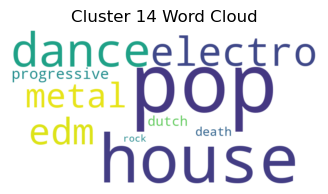

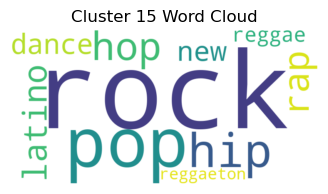

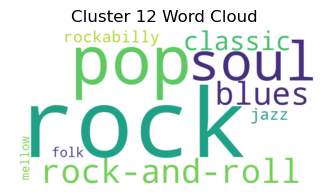

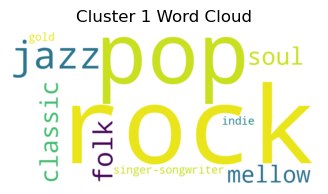

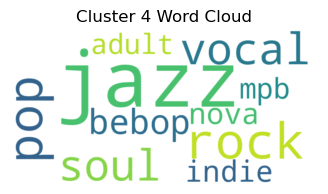

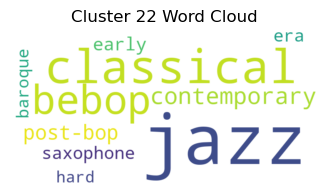

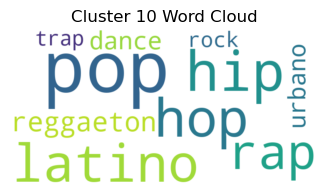

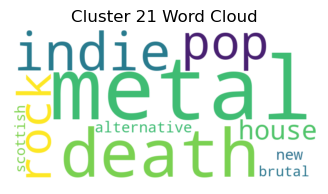

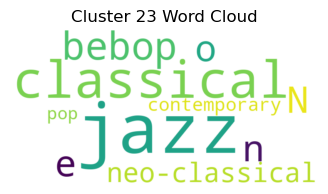

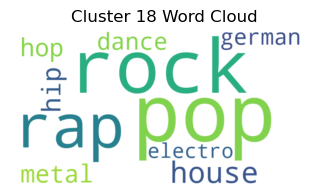

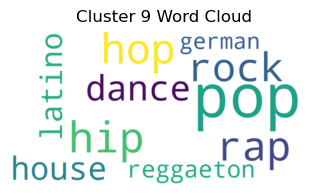

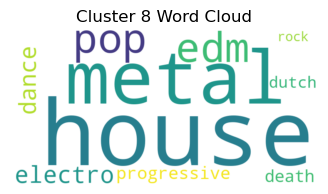

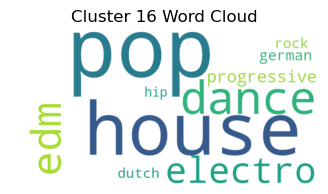

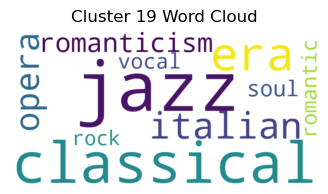

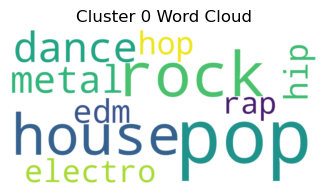

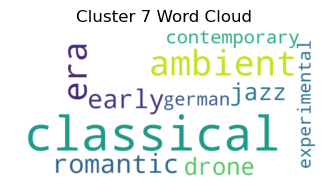

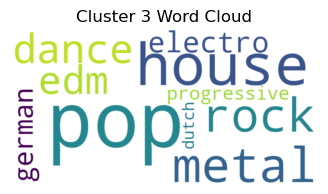

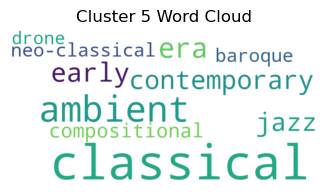

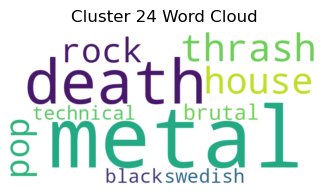

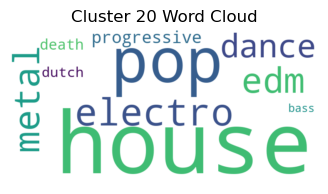

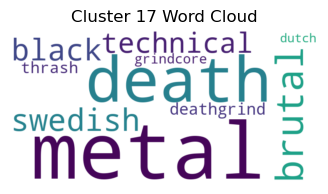

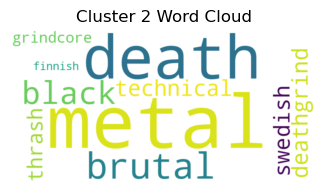

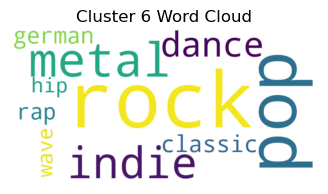

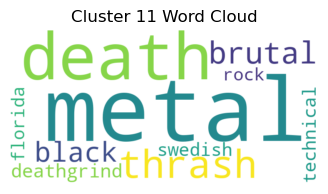

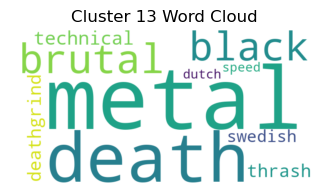

In [40]:
#create wordclouds of the most common genre related words per cluster
for cluster, words in cluster_word_freqs.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster} Word Cloud")
    #plt.savefig(f"cluster_{cluster}_wordcloud.png")
    plt.show()